In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import cv2
from PIL import Image

In [ ]:
file_with_mask=os.listdir(r"C:\Users\haider\Desktop\New folder (3)\Face Mask\data\with_mask")
file_without_mask=os.listdir(r"C:\Users\haider\Desktop\New folder (3)\Face Mask\data\without_mask")

print(len(file_with_mask),len(file_without_mask))
print(file_with_mask)
print(file_without_mask)

In [ ]:
os.mkdir(r"C:\Users\haider\Desktop\New folder (3)\Face Mask\dataets_file")
old_path_mask="C:\\Users\\haider\\Desktop\\New folder (3)\\Face Mask\\data\\with_mask\\"
new_path="C:\\Users\\haider\\Desktop\\New folder (3)\\Face Mask\\dataets_file\\"

for i in range(1000):
    file_index=file_with_mask[i]
    image_with_mask=Image.open(old_path_mask+file_index)
    image_with_mask=image_with_mask.resize((128,128))
    image_with_mask=image_with_mask.convert("RGB")
    image_with_mask.save(new_path+file_index)

In [ ]:
old_path_without_mask="C:\\Users\\haider\\Desktop\\New folder (3)\\Face Mask\\data\\without_mask\\"

for i in range(1000):
    file_index_2=file_without_mask[i]
    image_without_mask=Image.open(old_path_without_mask+file_index_2)
    image_without_mask=image_without_mask.resize((128,128))
    image_without_mask=image_without_mask.convert("RGB")
    image_without_mask.save(new_path+file_index_2)

In [ ]:
data_face=os.listdir(r"C:\Users\haider\Desktop\New folder (3)\Face Mask\dataets_file")
print(len(data_face),data_face)

In [6]:
label_of_dataset=[]

for item in data_face:
    if item[:5]=="with_":
        label_of_dataset.append(0)
    else:
        label_of_dataset.append(1)

label_ready=np.array(label_of_dataset)
print(len(label_ready),label_ready)

2000 [1 1 1 ... 0 0 0]


In [ ]:
data_of_face=[]

for face in data_face:
    face_image=Image.open(new_path+face)
    face_image=np.array(face_image)
    data_of_face.append(face_image)

data_ready=np.array(data_of_face)
print(len(data_of_face),data_of_face)

In [8]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(data_ready,label_ready,test_size=.2,random_state=42)
print(data_ready.shape,label_ready.shape,train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(2000, 128, 128, 3) (2000,) (1600, 128, 128, 3) (1600,) (400, 128, 128, 3) (400,)


In [9]:
train_x_set=train_x/255
test_x_set=test_x/255

In [10]:
import tensorflow as tf

In [11]:
model=tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(128,128,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(2, activation="sigmoid"))


c:\Users\haider\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [13]:
history=model.fit(train_x_set,train_y, validation_split=.1, epochs=5)

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.5943 - loss: 1.1602 - val_accuracy: 0.8438 - val_loss: 0.3776
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.8827 - loss: 0.3268 - val_accuracy: 0.8750 - val_loss: 0.2952
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9279 - loss: 0.2323 - val_accuracy: 0.8875 - val_loss: 0.2928
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.9383 - loss: 0.1757 - val_accuracy: 0.8938 - val_loss: 0.2938
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9539 - loss: 0.1380 - val_accuracy: 0.9000 - val_loss: 0.3265


In [14]:
loss, accuracy =model.evaluate(test_x_set,test_y)

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 332ms/step - accuracy: 0.9643 - loss: 0.1273


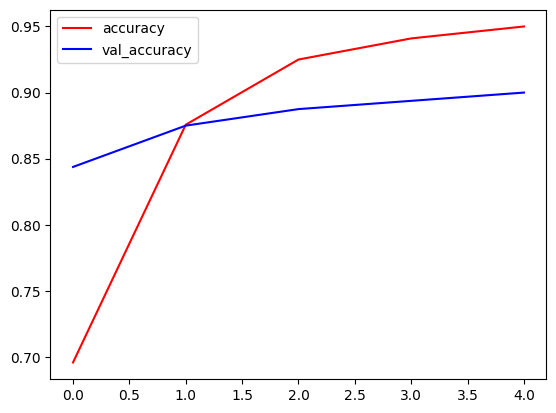

In [15]:
plt.plot(history.history["accuracy"],"r", label="accuracy")
plt.plot(history.history["val_accuracy"],"b", label="val_accuracy")
plt.legend()

In [16]:
pre=model.predict(test_x_set)
pre[0]

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 310ms/step


array([0.999869  , 0.00147209], dtype=float32)

In [17]:
pre[45]

array([0.7134845 , 0.41174057], dtype=float32)

In [18]:
model.save("face_mask_detection.keras")

In [ ]:
inputted_face=input("Enter the face picture:")
image=Image.open(inputted_face)
image=image.resize((128,128))
plt.imshow(image)
image=np.array(image)
image=image/255
image=image.reshape(1,128,128,3)
pred=model.predict(image)
prediction=pred.argmax()
pred
if prediction==0:
    print('This person is wearing a mask')
else:
    print("This person is not wearing mask")